## Import required modules

In [1]:
import numpy as np
import pandas as pd
import cv2
import random
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm
import os

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('C:/Users/Lucifer.LAPTOP-19ER5RAR/Desktop/Internship/Convolutional Neural Network/Dataset/set 2/full_df.csv')

data.head()

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4_right.jpg
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",5_right.jpg


In [4]:
###################### Initialize cataract as 1, else 0 ######################

def has_cataract(text):
    if "cataract" in text:
        return 1
    else:
        return 0

In [5]:
############### Create new column 'left & right cataract', store the values 1 & 0 in the created columns ###############

data['left_cataract'] = data['Left-Diagnostic Keywords'].apply(lambda x: has_cataract(x))
data['right_cataract'] = data['Right-Diagnostic Keywords'].apply(lambda x: has_cataract(x))

data.head()

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,...,A,H,M,O,filepath,labels,target,filename,left_cataract,right_cataract
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,...,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg,1,0
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,...,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg,0,0
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,...,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg,0,0
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,...,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4_right.jpg,0,0
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,...,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",5_right.jpg,0,0


In [6]:
left_cataract = data.loc[(data.C == 1) & (data.left_cataract == 1)]['Left-Fundus'].values
right_cataract = data.loc[(data.C == 1) & (data.right_cataract == 1)]['Right-Fundus'].values


In [7]:
print('No. of images in Right Cataract : ',len(right_cataract))
print('No. of images in Left Cataract : ',len(left_cataract))

No. of images in Right Cataract :  290
No. of images in Left Cataract :  304


In [8]:
left_normal = data.loc[(data.C == 0) & (data['Left-Diagnostic Keywords'] == 'normal fundus')]['Left-Fundus'].sample(300, random_state = 42).values
right_normal = data.loc[(data.C == 0) & (data['Right-Diagnostic Keywords'] == 'normal fundus')]['Right-Fundus'].sample(300, random_state = 42).values


In [9]:
print(left_normal[:10])

print('\n\n')

print(right_normal[:10])


['3332_left.jpg' '4059_left.jpg' '69_left.jpg' '2415_left.jpg'
 '4176_left.jpg' '2711_left.jpg' '4614_left.jpg' '3174_left.jpg'
 '2862_left.jpg' '2424_left.jpg']



['2964_right.jpg' '680_right.jpg' '500_right.jpg' '2368_right.jpg'
 '2820_right.jpg' '2769_right.jpg' '2696_right.jpg' '2890_right.jpg'
 '940_right.jpg' '2553_right.jpg']


In [10]:
cataract = np.concatenate((left_cataract, right_cataract), axis = 0)
normal = np.concatenate((left_normal, right_normal), axis = 0)

In [11]:
print('Length of Cataract : ', len(cataract))
print('Length of Normal : ', len(normal))

Length of Cataract :  594
Length of Normal :  600


## Image Preprocessing

In [12]:
from tensorflow.keras.preprocessing.image import load_img,img_to_array


dataset_dir = 'C:/Users/Lucifer.LAPTOP-19ER5RAR/Desktop/Internship/Convolutional Neural Network/Dataset/set 2/preprocessed_images/'
image_size=224
labels = []
dataset = []


In [13]:
def create_dataset(image_category,label):
    
    for img in tqdm(image_category):
        image_path = os.path.join(dataset_dir,img)
        
        try:
            image = cv2.imread(image_path,cv2.IMREAD_COLOR)
            image = cv2.resize(image,(image_size,image_size))
        
        except:
            continue
        
        dataset.append([np.array(image),np.array(label)])
    random.shuffle(dataset)
    return dataset

In [14]:
dataset = create_dataset(cataract, 1)

100%|██████████| 594/594 [00:05<00:00, 108.57it/s]


In [15]:
len(dataset)

588

In [16]:
dataset = create_dataset(normal,0)

100%|██████████| 600/600 [00:05<00:00, 101.63it/s]


In [17]:
len(dataset)

1188

### Sample Output to check whether the fundus images are cataract or normal

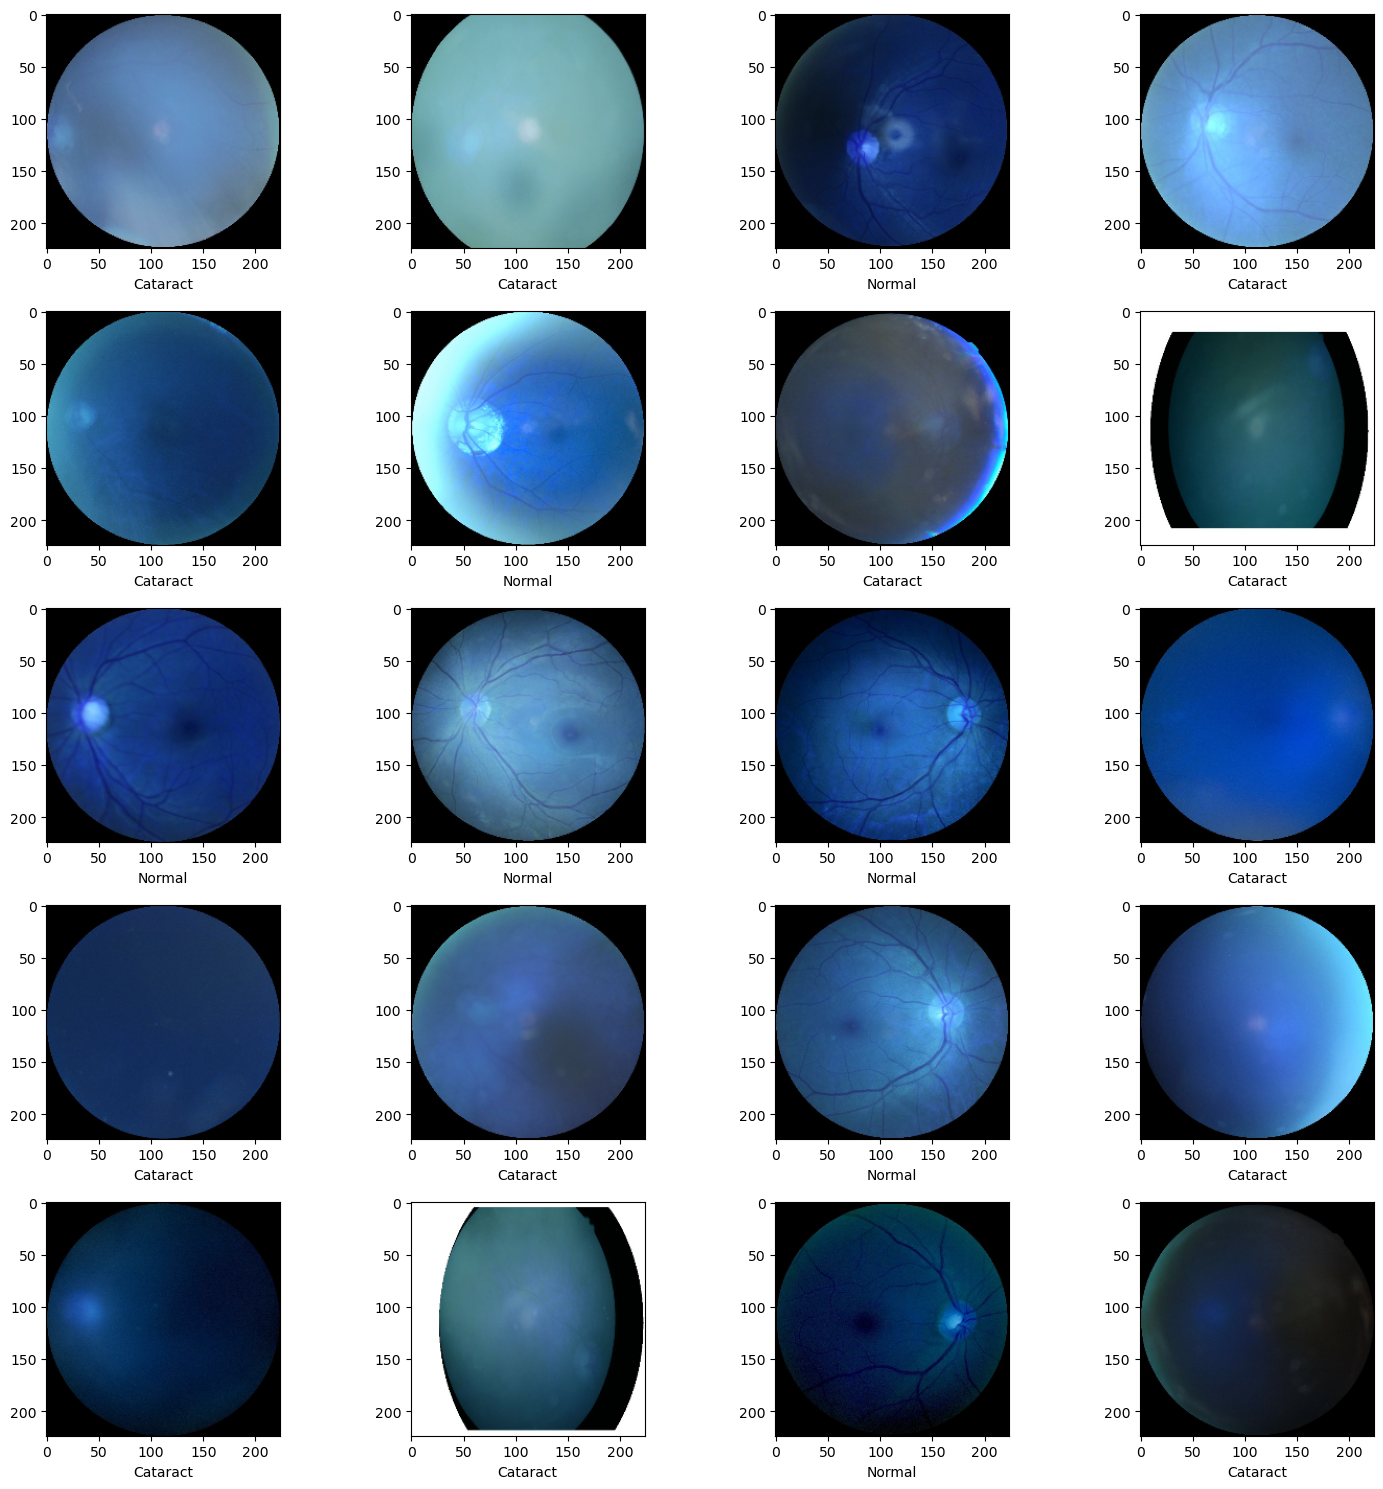

In [18]:
plt.figure(figsize = (15,15))

for i in range(20):
    sample = random.choice(range(len(dataset)))
    image = dataset[sample][0]
    category = dataset[sample][1]
    
    if category == 1:
        label = 'Cataract'
        
    else:
        label = 'Normal'
        
    plt.subplot(5, 4, i+1)
    plt.imshow(image)
    plt.xlabel(label)

plt.tight_layout()

In [19]:
###################### Create Input & Output set for testing & training model ######################

x = np.array([i[0] for i in dataset]).reshape(-1, image_size, image_size, 3)
y = np.array([i[1] for i in dataset])

In [20]:
x.shape

(1188, 224, 224, 3)

In [21]:
y.shape

(1188,)

In [22]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 100)

In [23]:
from tensorflow.keras.applications.vgg19 import VGG19

vgg = VGG19(weights = 'imagenet', include_top = False, input_shape = (image_size,image_size,3))

In [24]:
for layer in vgg.layers:
    layer.trainable = False

In [25]:
############## Use Sequential model to train ##############

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense


In [26]:
model = Sequential()
model.add(vgg)
model.add(Flatten())
model.add(Dense(1, activation = 'sigmoid'))

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 1)                 25089     
                                                                 
Total params: 20,049,473
Trainable params: 25,089
Non-trainable params: 20,024,384
_________________________________________________________________


In [28]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])


In [29]:
############## Create a trained model in "Model.h5" file ##############

from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping

checkpoint = ModelCheckpoint('CNN_Trained_Model.h5', monitor = 'val_accuracy', verbose = 1, save_best_only = True,
                             save_weights_only = False, save_freq = 'epoch')

earlystop = EarlyStopping(monitor = 'val_accuracy', patience = 5, verbose = 1)

In [30]:
############## Fit the model to train and check loss & accuracy ##############

history = model.fit(x_train, y_train, batch_size = 32, epochs = 15, validation_data = (x_test,y_test), 
                    verbose = 1, callbacks = [checkpoint, earlystop])

Epoch 1/15
30/30 [==============================] - ETA: 0s - loss: 1.5757 - accuracy: 0.8842 
Epoch 1: val_accuracy improved from -inf to 0.94118, saving model to CNN_Trained_Model.h5
30/30 [==============================] - 533s 18s/step - loss: 1.5757 - accuracy: 0.8842 - val_loss: 0.8137 - val_accuracy: 0.9412
Epoch 2/15
30/30 [==============================] - ETA: 0s - loss: 0.2698 - accuracy: 0.9600 
Epoch 2: val_accuracy improved from 0.94118 to 0.96639, saving model to CNN_Trained_Model.h5
30/30 [==============================] - 485s 16s/step - loss: 0.2698 - accuracy: 0.9600 - val_loss: 0.2373 - val_accuracy: 0.9664
Epoch 3/15
30/30 [==============================] - ETA: 0s - loss: 0.0546 - accuracy: 0.9874
Epoch 3: val_accuracy did not improve from 0.96639
30/30 [==============================] - 297s 10s/step - loss: 0.0546 - accuracy: 0.9874 - val_loss: 0.2315 - val_accuracy: 0.9664
Epoch 4/15
30/30 [==============================] - ETA: 0s - loss: 0.0075 - accuracy: 0.

In [31]:
loss, accuracy = model.evaluate(x_test, y_test)


8/8 [==============================] - 52s 6s/step - loss: 0.1155 - accuracy: 0.9874


In [32]:
print('Loss : {:.2f}%'.format(loss * 100))
print('Accuracy : {:.2f}%'.format(accuracy * 100))


Loss : 11.55%
Accuracy : 98.74%


In [33]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

y_pred = model.predict(x_test)


8/8 [==============================] - 52s 6s/step


In [34]:
############## As the "y_pred" is continuous use threshold = 0.5 ##############

threshold = 0.5

y_pred_binary = y_pred > threshold

In [35]:
acc_sc = accuracy_score(y_test, y_pred_binary)
print('Accuracy Score :{:.2f}%'.format(acc_sc * 100))

Accuracy Score :98.74%


In [36]:
print(classification_report(y_test, y_pred_binary))


              precision    recall  f1-score   support

           0       1.00      0.97      0.99       120
           1       0.98      1.00      0.99       118

    accuracy                           0.99       238
   macro avg       0.99      0.99      0.99       238
weighted avg       0.99      0.99      0.99       238



(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot: xlabel='predicted label', ylabel='true label'>)

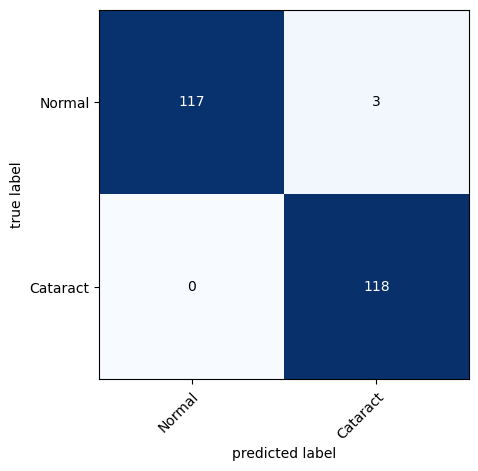

In [37]:
############## Plot Confusion Matrix ##############

from mlxtend.plotting import plot_confusion_matrix

cm = confusion_matrix(y_test, y_pred_binary)
plot_confusion_matrix(conf_mat = cm, class_names = ["Normal","Cataract"])

## Actucal Output

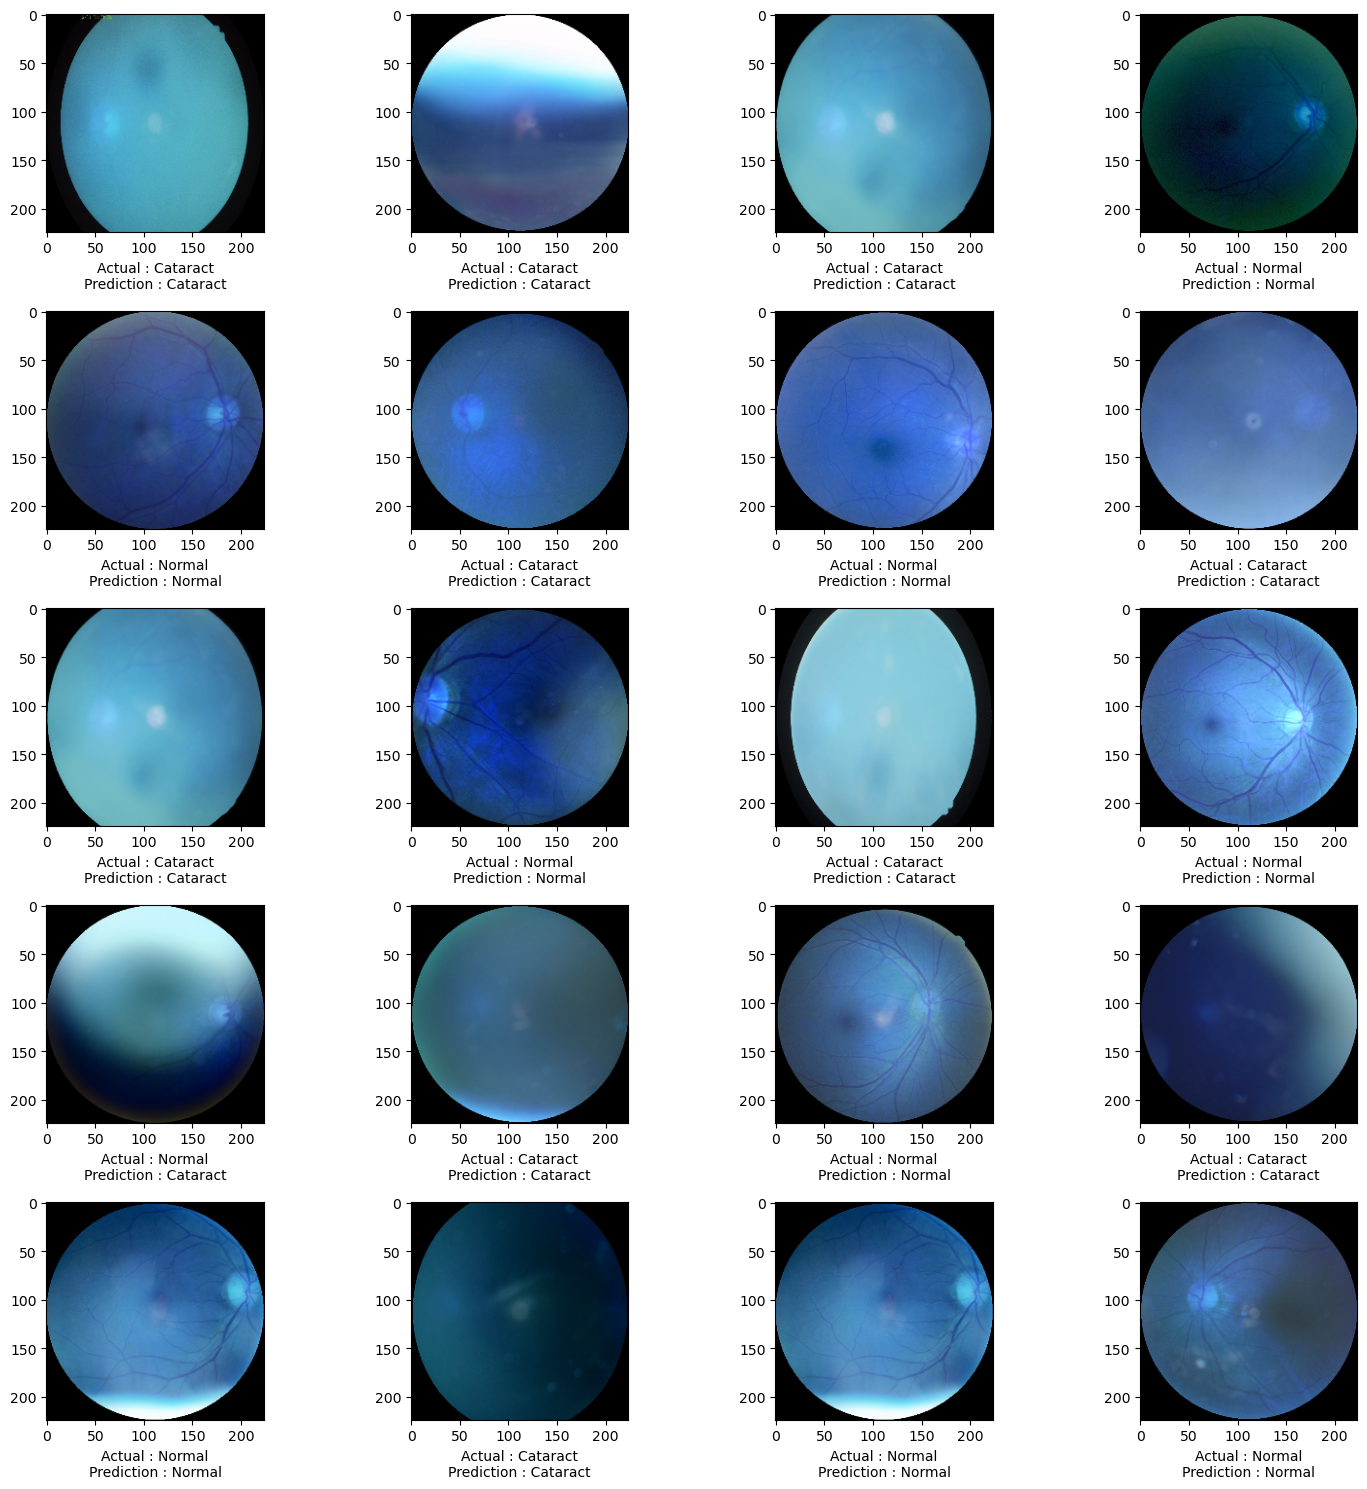

In [38]:
plt.figure(figsize = (15,15))

for i in range(20):
    
    sample = random.choice(range(len(x_test)))
    image = x_test[sample]
    category = y_test[sample]
    pred_category = y_pred_binary[sample]
    
    if category == 1:
        label = 'Cataract'
    else:
        label = 'Normal'
        
    if pred_category == 1:
        pred_label = 'Cataract'
    else:
        pred_label = 'Normal'
        
    plt.subplot(5, 4, i+1)
    plt.imshow(image)
    
    plt.xlabel('Actual : {}\nPrediction : {}'.format(label, pred_label))
    
plt.tight_layout() 